In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/Payod/Downloads/bank-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
data['y']=data.y.astype('category')
data['job']=data.job.astype('category')
data['marital']=data.marital.astype('category')
data['education']=data.education.astype('category')
data['default']=data.default.astype('category')
data['housing']=data.housing.astype('category')
data['loan']=data.loan.astype('category')
data['contact']=data.contact.astype('category')
data['month']=data.month.astype('category')
data['poutcome']=data.poutcome.astype('category')

In [12]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [14]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
data.shape

(45211, 17)

In [18]:
print('Minimum age: ', data['age'].min())
print('Maximum age: ',data['age'].max())
print('Mean value: ', data['age'].mean())
print('Median value: ',data['age'].median())
print('Standard deviation: ', data['age'].std())
print('Null values: ',data['age'].isnull().any())

Minimum age:  18
Maximum age:  95
Mean value:  40.93621021432837
Median value:  39.0
Standard deviation:  10.618762040975431
Null values:  False


In [19]:
Q1=data['age'].quantile(q=0.25)
Q3=data['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  33.0
3st Quartile (Q3) is:  48.0


# Data Visualizing 

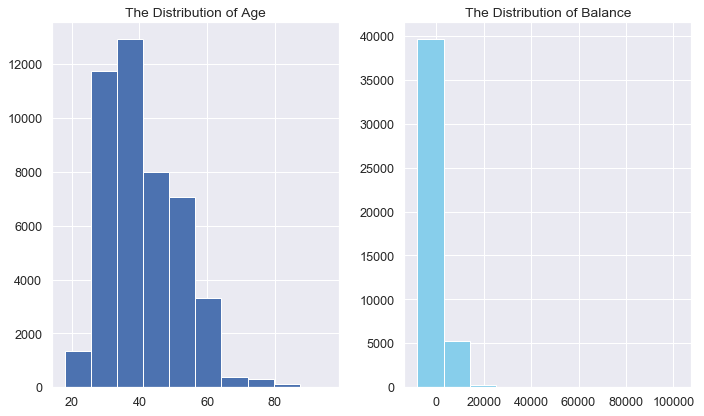

In [97]:
age_balance = plt.figure(figsize = (10,6))

hist1 = age_balance.add_subplot(1,2,1) 
hist2 = age_balance.add_subplot(1,2,2)

hist1.hist(data['age'])
hist1.set_title('The Distribution of Age')

hist2.hist(data['balance'], color = 'skyblue')
hist2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Jobs')

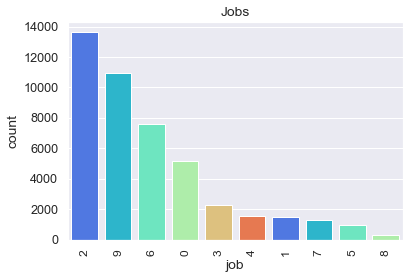

In [98]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=data, palette = pal, 
              order=data['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

### Bar plot for all categorical variables in the dataset

Text(0.5, 1.0, 'Marital Status')

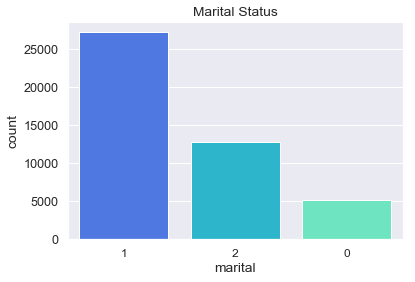

In [99]:
sns.countplot(x='marital', data=data, palette = pal, 
              order=data['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

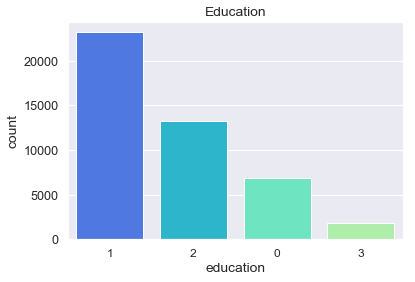

In [100]:
sns.countplot(x='education', data=data, palette = pal, 
              order=data['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

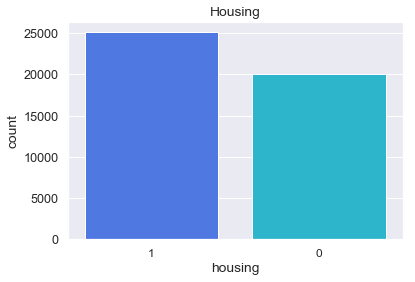

In [101]:
sns.countplot(x='housing', data=data, palette = pal, 
              order=data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')

Text(0.5, 1.0, 'Loan')

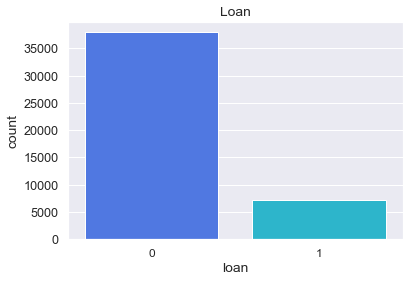

In [102]:
sns.countplot(x='loan', data=data, palette = pal, 
              order=data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')

# Trasnformations using Q-Q Plots

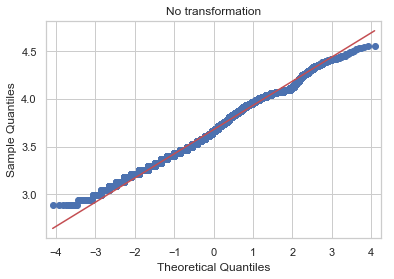

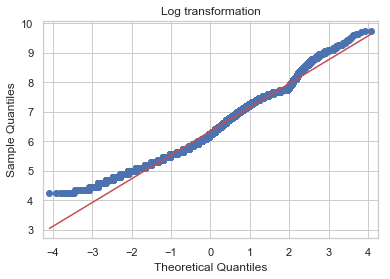

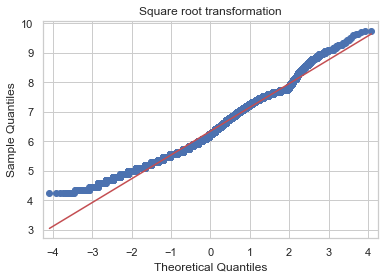

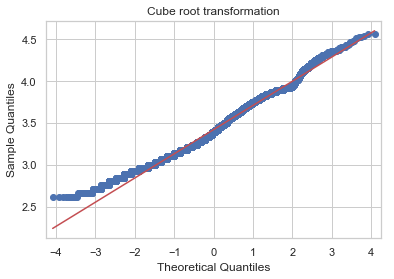

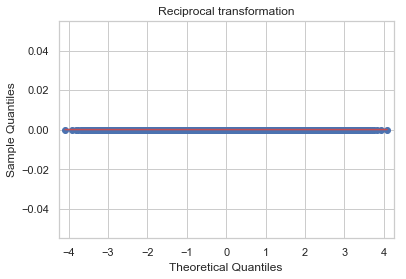

In [4]:
smf.qqplot(np.log(data['age']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['age']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['age']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['age']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(data['age']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()

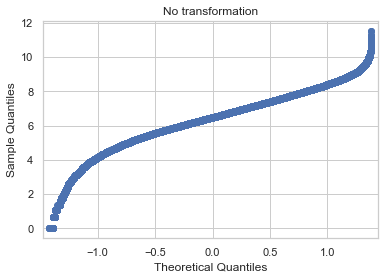

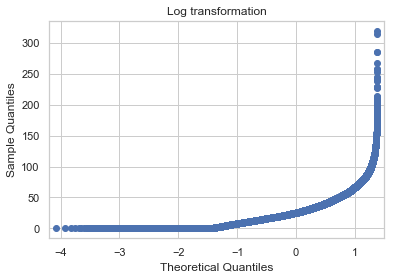

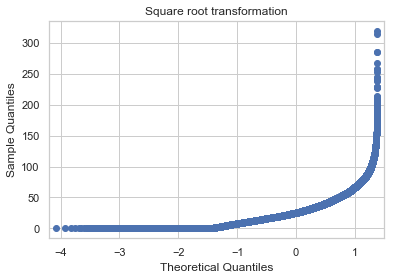

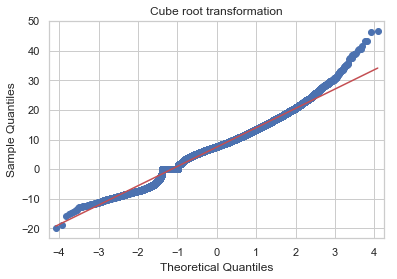

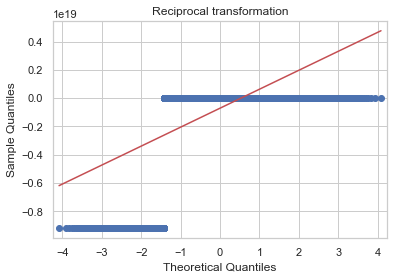

In [7]:
smf.qqplot(np.log(data['balance']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['balance']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['balance']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['balance']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(data['balance']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()

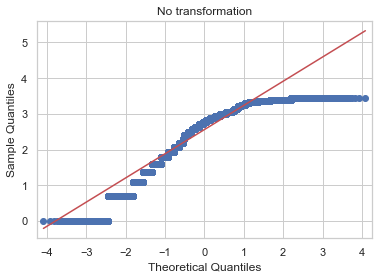

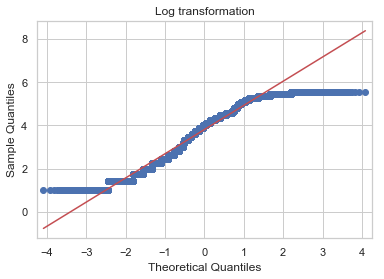

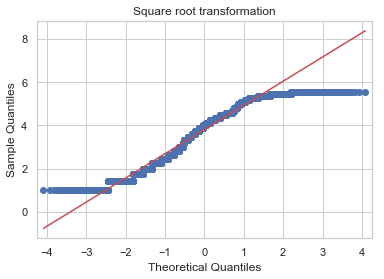

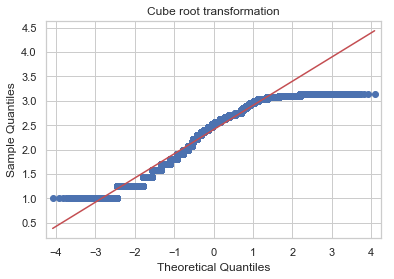

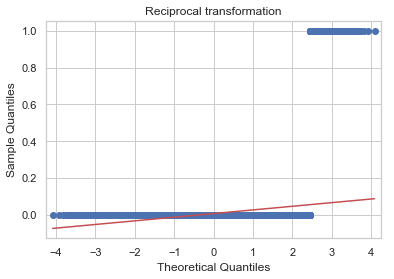

In [10]:
smf.qqplot(np.log(data['day']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['day']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['day']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['day']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(data['day']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()

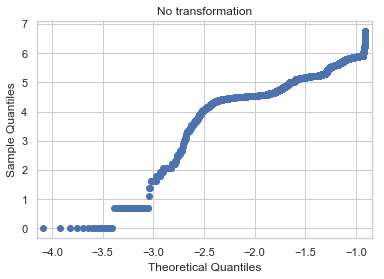

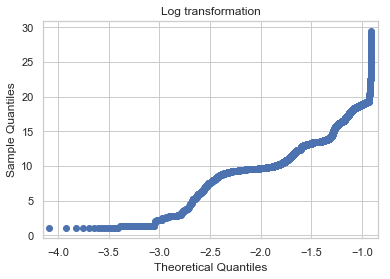

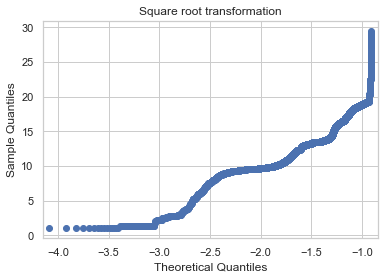

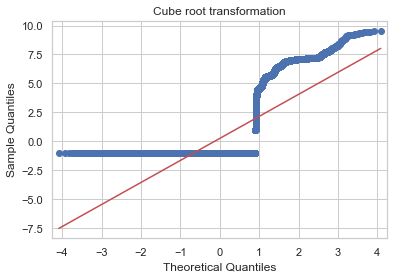

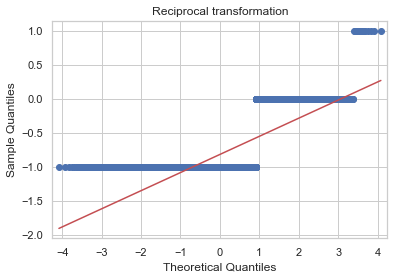

In [11]:
smf.qqplot(np.log(data['pdays']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['pdays']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['pdays']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['pdays']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(data['pdays']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()

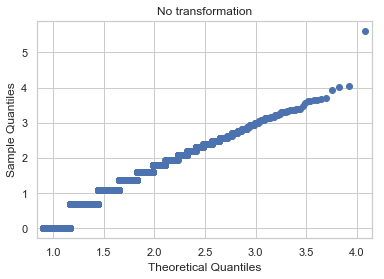

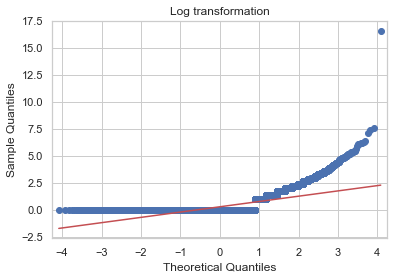

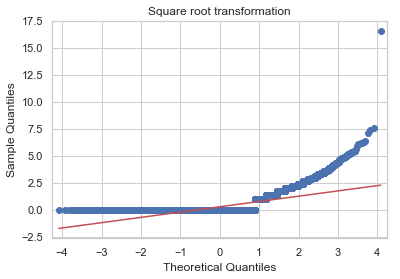

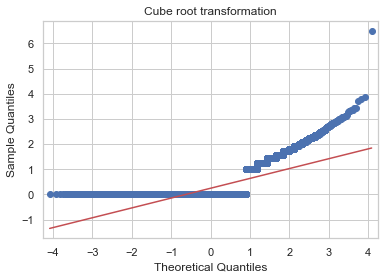

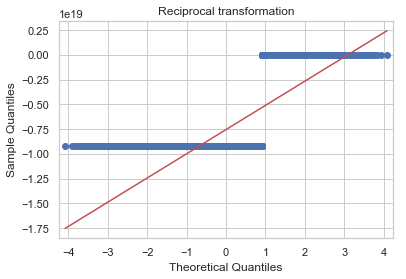

In [12]:
smf.qqplot(np.log(data['previous']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['previous']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['previous']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['previous']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(data['previous']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()

# Detecting Outliers

In [20]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages: ', L_outliers)
print('Upper outliers in Ages: ', U_outliers)

Lower outliers in Ages:  10.5
Upper outliers in Ages:  70.5


In [22]:
print('Number of outliers in Age upper : ', data[data['age']>70.5]['age'].count())
print('Number of outliers in Age lower : ', data[data['age']<10.5]['age'].count())
print('% of Outlier in Age upper: ',round(data[data['age']>70.5]['age'].count()*100/len(data)), '%')
print('% of Outlier in Age lower: ',round(data[data['age']<10.5]['age'].count()*100/len(data)), '%')

Number of outliers in Age upper :  487
Number of outliers in Age lower :  0
% of Outlier in Age upper:  1.0 %
% of Outlier in Age lower:  0.0 %


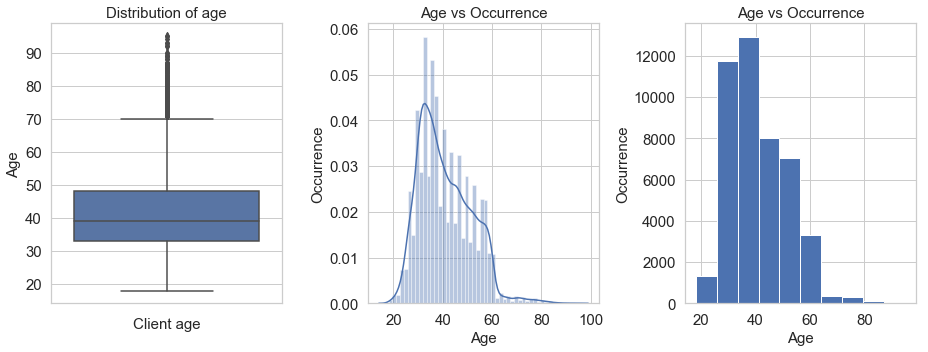

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='age',data=data,orient='v',ax=ax1)
ax1.set_xlabel('Client age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(data['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Age vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [24]:
print('Jobs: \n', data['job'].unique())

Jobs: 
 [management, technician, entrepreneur, blue-collar, unknown, ..., services, self-employed, unemployed, housemaid, student]
Length: 12
Categories (12, object): [management, technician, entrepreneur, blue-collar, ..., self-employed, unemployed, housemaid, student]


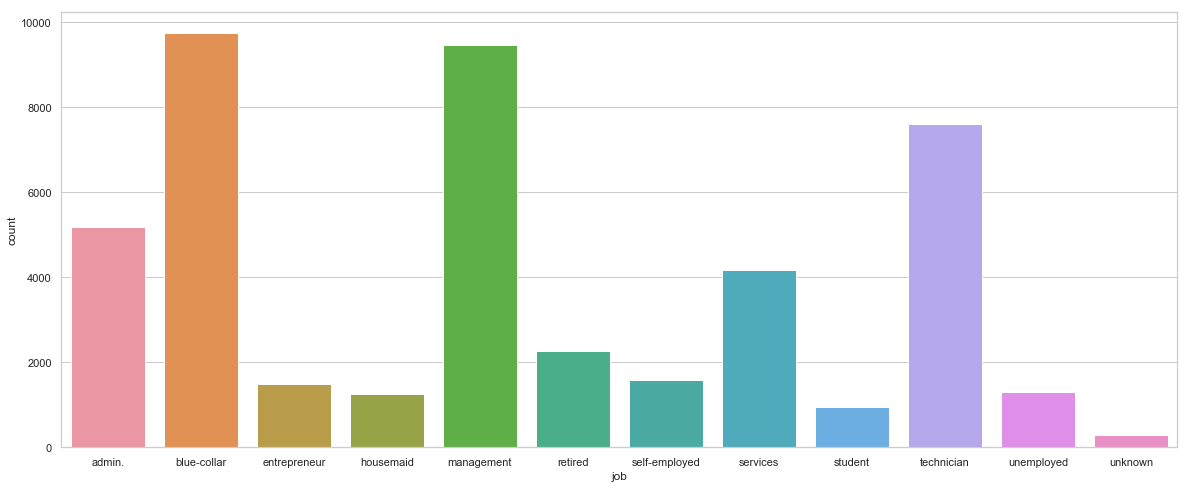

In [25]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

sns.countplot(data['job'],data=data)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

In [27]:
data['job']=np.where(data['job']=='blue-collar','worker',data['job'])
data['job']=np.where(data['job']=='housemaid','worker',data['job'])
data['job']=np.where(data['job']=='management','managerial',data['job'])
data['job']=np.where(data['job']=='services','managerial',data['job'])
data['job']=np.where(data['job']=='admin','managerial',data['job'])
data['job']=np.where(data['job']=='enterpreneur','managerial',data['job'])

data['job'].unique()

array(['managerial', 'technician', 'entrepreneur', 'worker', 'unknown',
       'retired', 'admin.', 'self-employed', 'unemployed', 'student'],
      dtype=object)

In [28]:
print('Marital: \n', data['marital'].unique())

Marital: 
 [married, single, divorced]
Categories (3, object): [married, single, divorced]


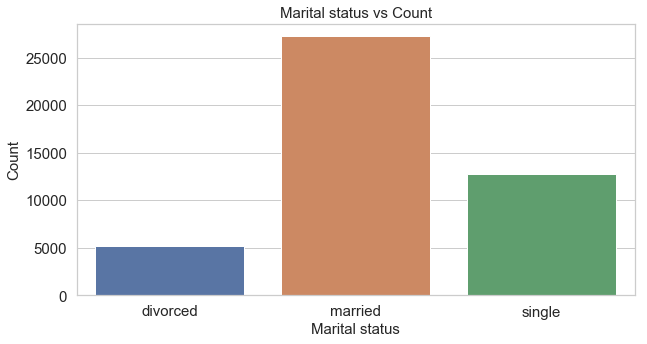

In [29]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['marital'],data=data)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [30]:
print('Education: \n', data['education'].unique())

Education: 
 [tertiary, secondary, unknown, primary]
Categories (4, object): [tertiary, secondary, unknown, primary]


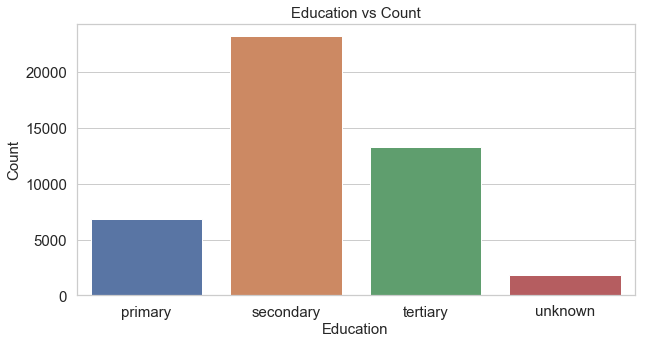

In [31]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['education'],data=data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [32]:
print('Default: \n', data['default'].unique())

Default: 
 [no, yes]
Categories (2, object): [no, yes]


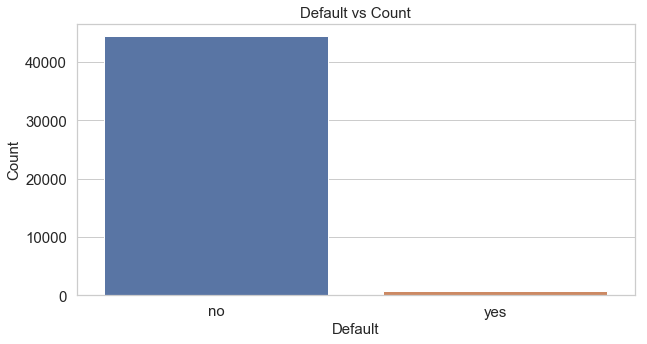

In [33]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['default'],data=data)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [34]:
print('Housing: \n', data['housing'].unique())

Housing: 
 [yes, no]
Categories (2, object): [yes, no]


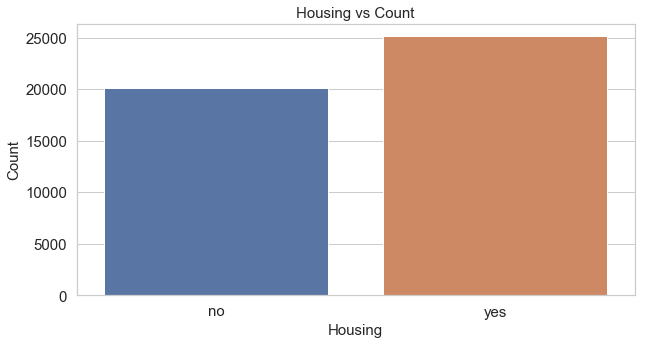

In [37]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['housing'],data=data)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [38]:
print('Loan: \n', data['loan'].unique())

Loan: 
 [no, yes]
Categories (2, object): [no, yes]


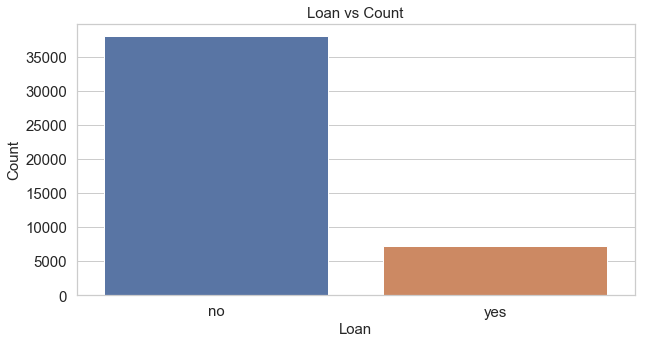

In [40]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['loan'],data=data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [42]:
print('Minimum balance: ', data['balance'].min())
print('Maximum balance: ',data['balance'].max())
print('Mean value: ', data['balance'].mean())
print('Median value: ',data['balance'].median())
print('Standard deviation: ', data['balance'].std())
print('Null values: ',data['balance'].isnull().any())

Minimum balance:  -8019
Maximum balance:  102127
Mean value:  1362.2720576850766
Median value:  448.0
Standard deviation:  3044.7658291686002
Null values:  False


In [43]:
Q1=data['balance'].quantile(q=0.25)
Q3=data['balance'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  72.0
3st Quartile (Q3) is:  1428.0


In [44]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Balance: ', L_outliers)
print('Upper outliers in Balance: ', U_outliers)

Lower outliers in Balance:  -1962.0
Upper outliers in Balance:  3462.0


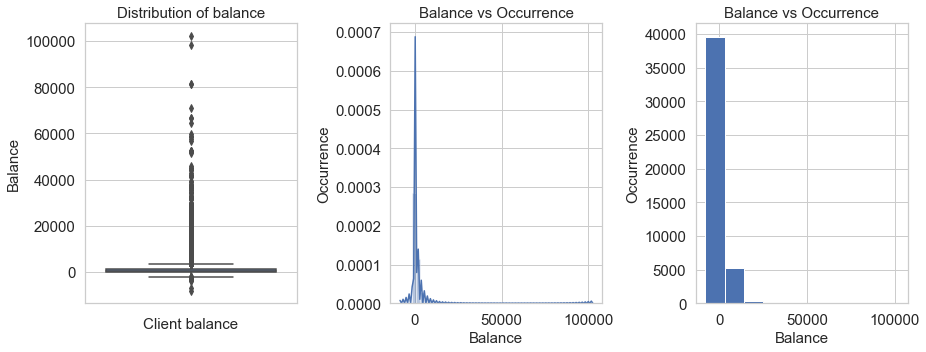

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='balance',data=data,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(data['balance'])
ax3.set_xlabel('Balance', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Balance vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [46]:
print('Contact: \n', data['contact'].unique())

Contact: 
 [unknown, cellular, telephone]
Categories (3, object): [unknown, cellular, telephone]


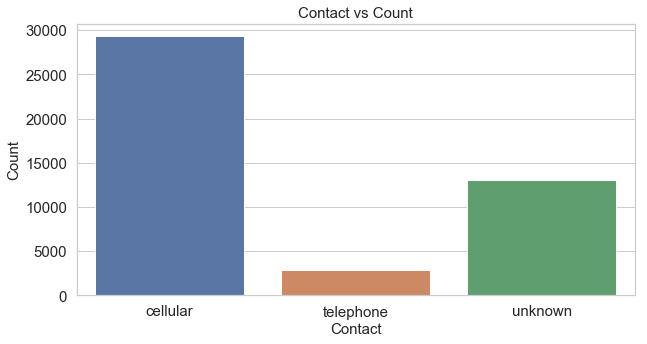

In [47]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['contact'],data=data)
ax.set_xlabel('Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [48]:
print('Day: \n', data['loan'].unique())
print('Month: \n', data['loan'].unique())

Day: 
 [no, yes]
Categories (2, object): [no, yes]
Month: 
 [no, yes]
Categories (2, object): [no, yes]


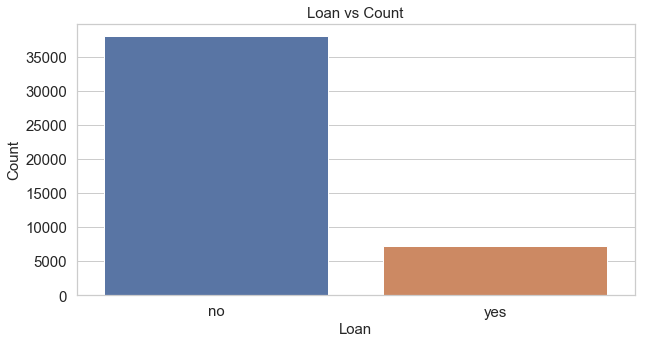

In [49]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['loan'],data=data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

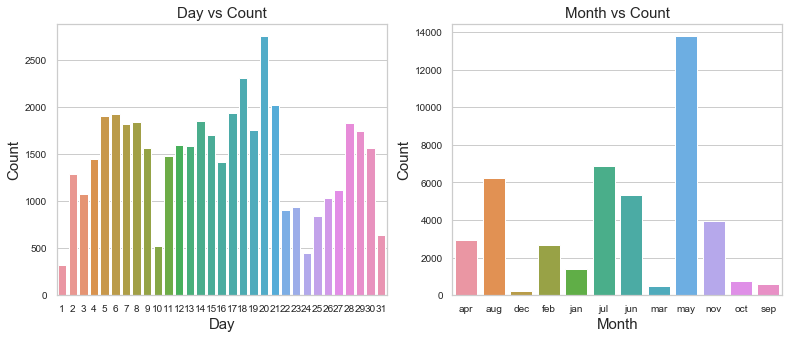

In [50]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.countplot(data['day'],data=data,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Day vs Count', fontsize=15)
ax1.tick_params(labelsize=10)


sns.countplot(data['month'],data=data,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Month vs Count', fontsize=15)
ax2.tick_params(labelsize=10)

In [51]:
print('Minimum duration calls in seconds: ', data['duration'].min())
print('Maximum duration calls in seconds: ',data['duration'].max())
print('Mean duration calls in seconds: ', data['duration'].mean())
print('Median duration calls in seconds: ',data['duration'].median())
print('Standard deviation: ', data['duration'].std())
print('Null values: ',data['duration'].isnull().any())

Minimum duration calls in seconds:  0
Maximum duration calls in seconds:  4918
Mean duration calls in seconds:  258.1630797814691
Median duration calls in seconds:  180.0
Standard deviation:  257.52781226517095
Null values:  False


In [52]:
Q1=data['duration'].quantile(q=0.25)
Q3=data['duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  103.0
3st Quartile (Q3) is:  319.0


In [53]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -221.0
Upper outliers in Duration:  643.0


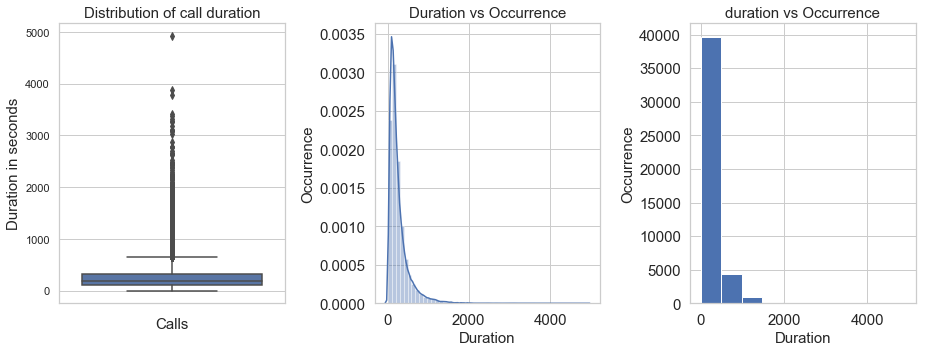

In [54]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='duration',data=data,orient='v',ax=ax1)
ax1.set_xlabel('Calls', fontsize=15)
ax1.set_ylabel('Duration in seconds', fontsize=15)
ax1.set_title('Distribution of call duration', fontsize=15)

sns.distplot(data['duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(data['duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('duration vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [55]:
print('Poutcome: \n', data['poutcome'].unique())

Poutcome: 
 [unknown, failure, other, success]
Categories (4, object): [unknown, failure, other, success]


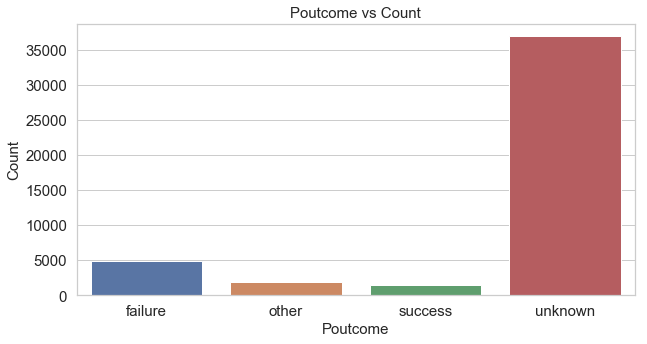

In [56]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['poutcome'],data=data)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [58]:
print('y: \n', data['y'].unique())

y: 
 [no, yes]
Categories (2, object): [no, yes]


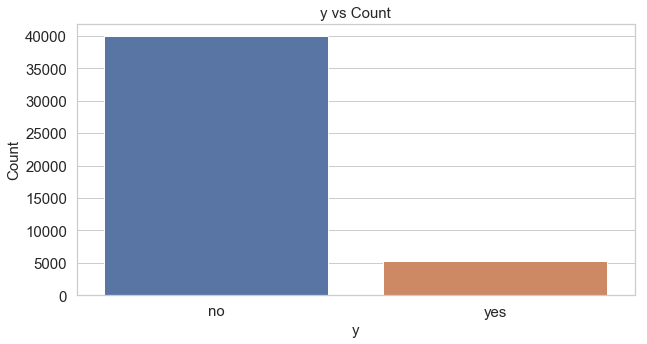

In [59]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data['y'],data=data)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('y vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# Encoding 

In [60]:
labelencoder_X=LabelEncoder()
data['job']=labelencoder_X.fit_transform(data['job'])
data['marital']=labelencoder_X.fit_transform(data['marital'])
data['education']=labelencoder_X.fit_transform(data['education'])
data['default']=labelencoder_X.fit_transform(data['default'])
data['housing']=labelencoder_X.fit_transform(data['housing'])
data['loan']=labelencoder_X.fit_transform(data['loan'])
data['contact']= labelencoder_X.fit_transform(data['contact']) 
data['month']= labelencoder_X.fit_transform(data['month']) 
data['poutcome'] = labelencoder_X.fit_transform(data['poutcome'])
data['y'] = labelencoder_X.fit_transform(data['y'])


In [61]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,6,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,1,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,9,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,8,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Visualization

In [62]:
cor=data.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.019980,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.019980,1.000000,-0.012009,-0.320070,0.006475,-0.036583,0.066957,-0.015011,0.094748,-0.007327,0.015160,0.010794,0.015967,-0.007486,-0.023964,0.023881,-0.053212
marital,-0.403240,-0.012009,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,-0.320070,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,0.006475,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,-0.036583,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,0.066957,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.015011,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,0.094748,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,-0.007327,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


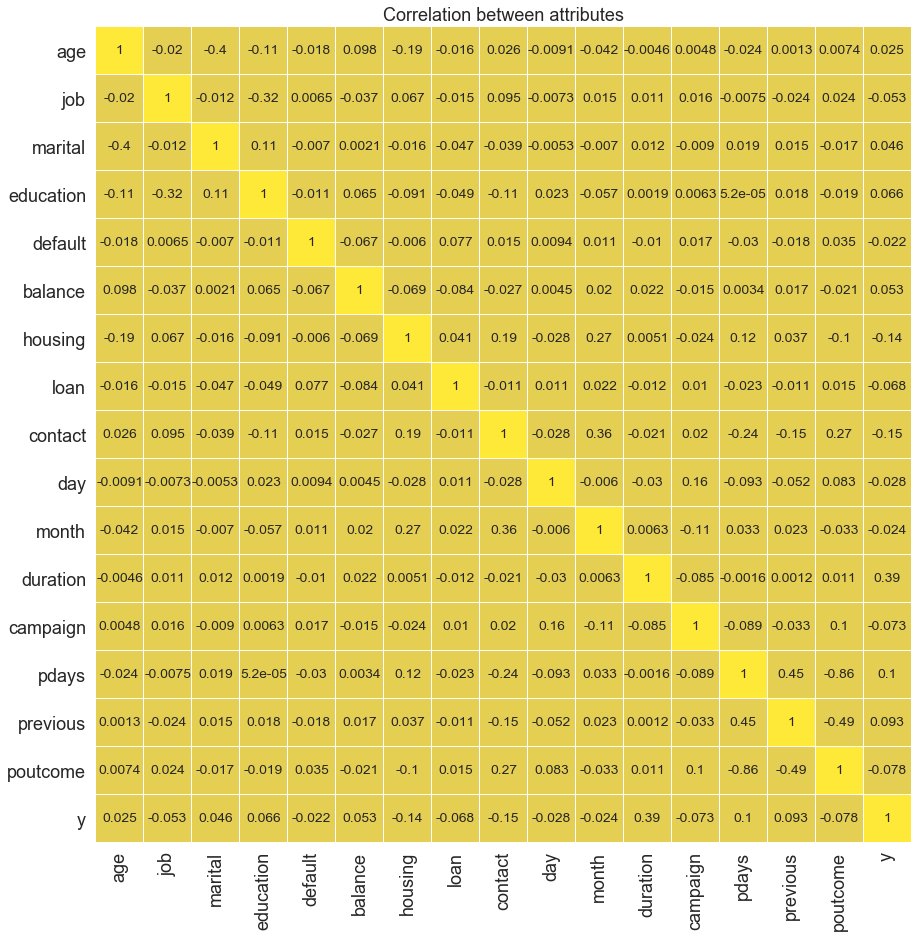

In [63]:
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8,cmap='cividis', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

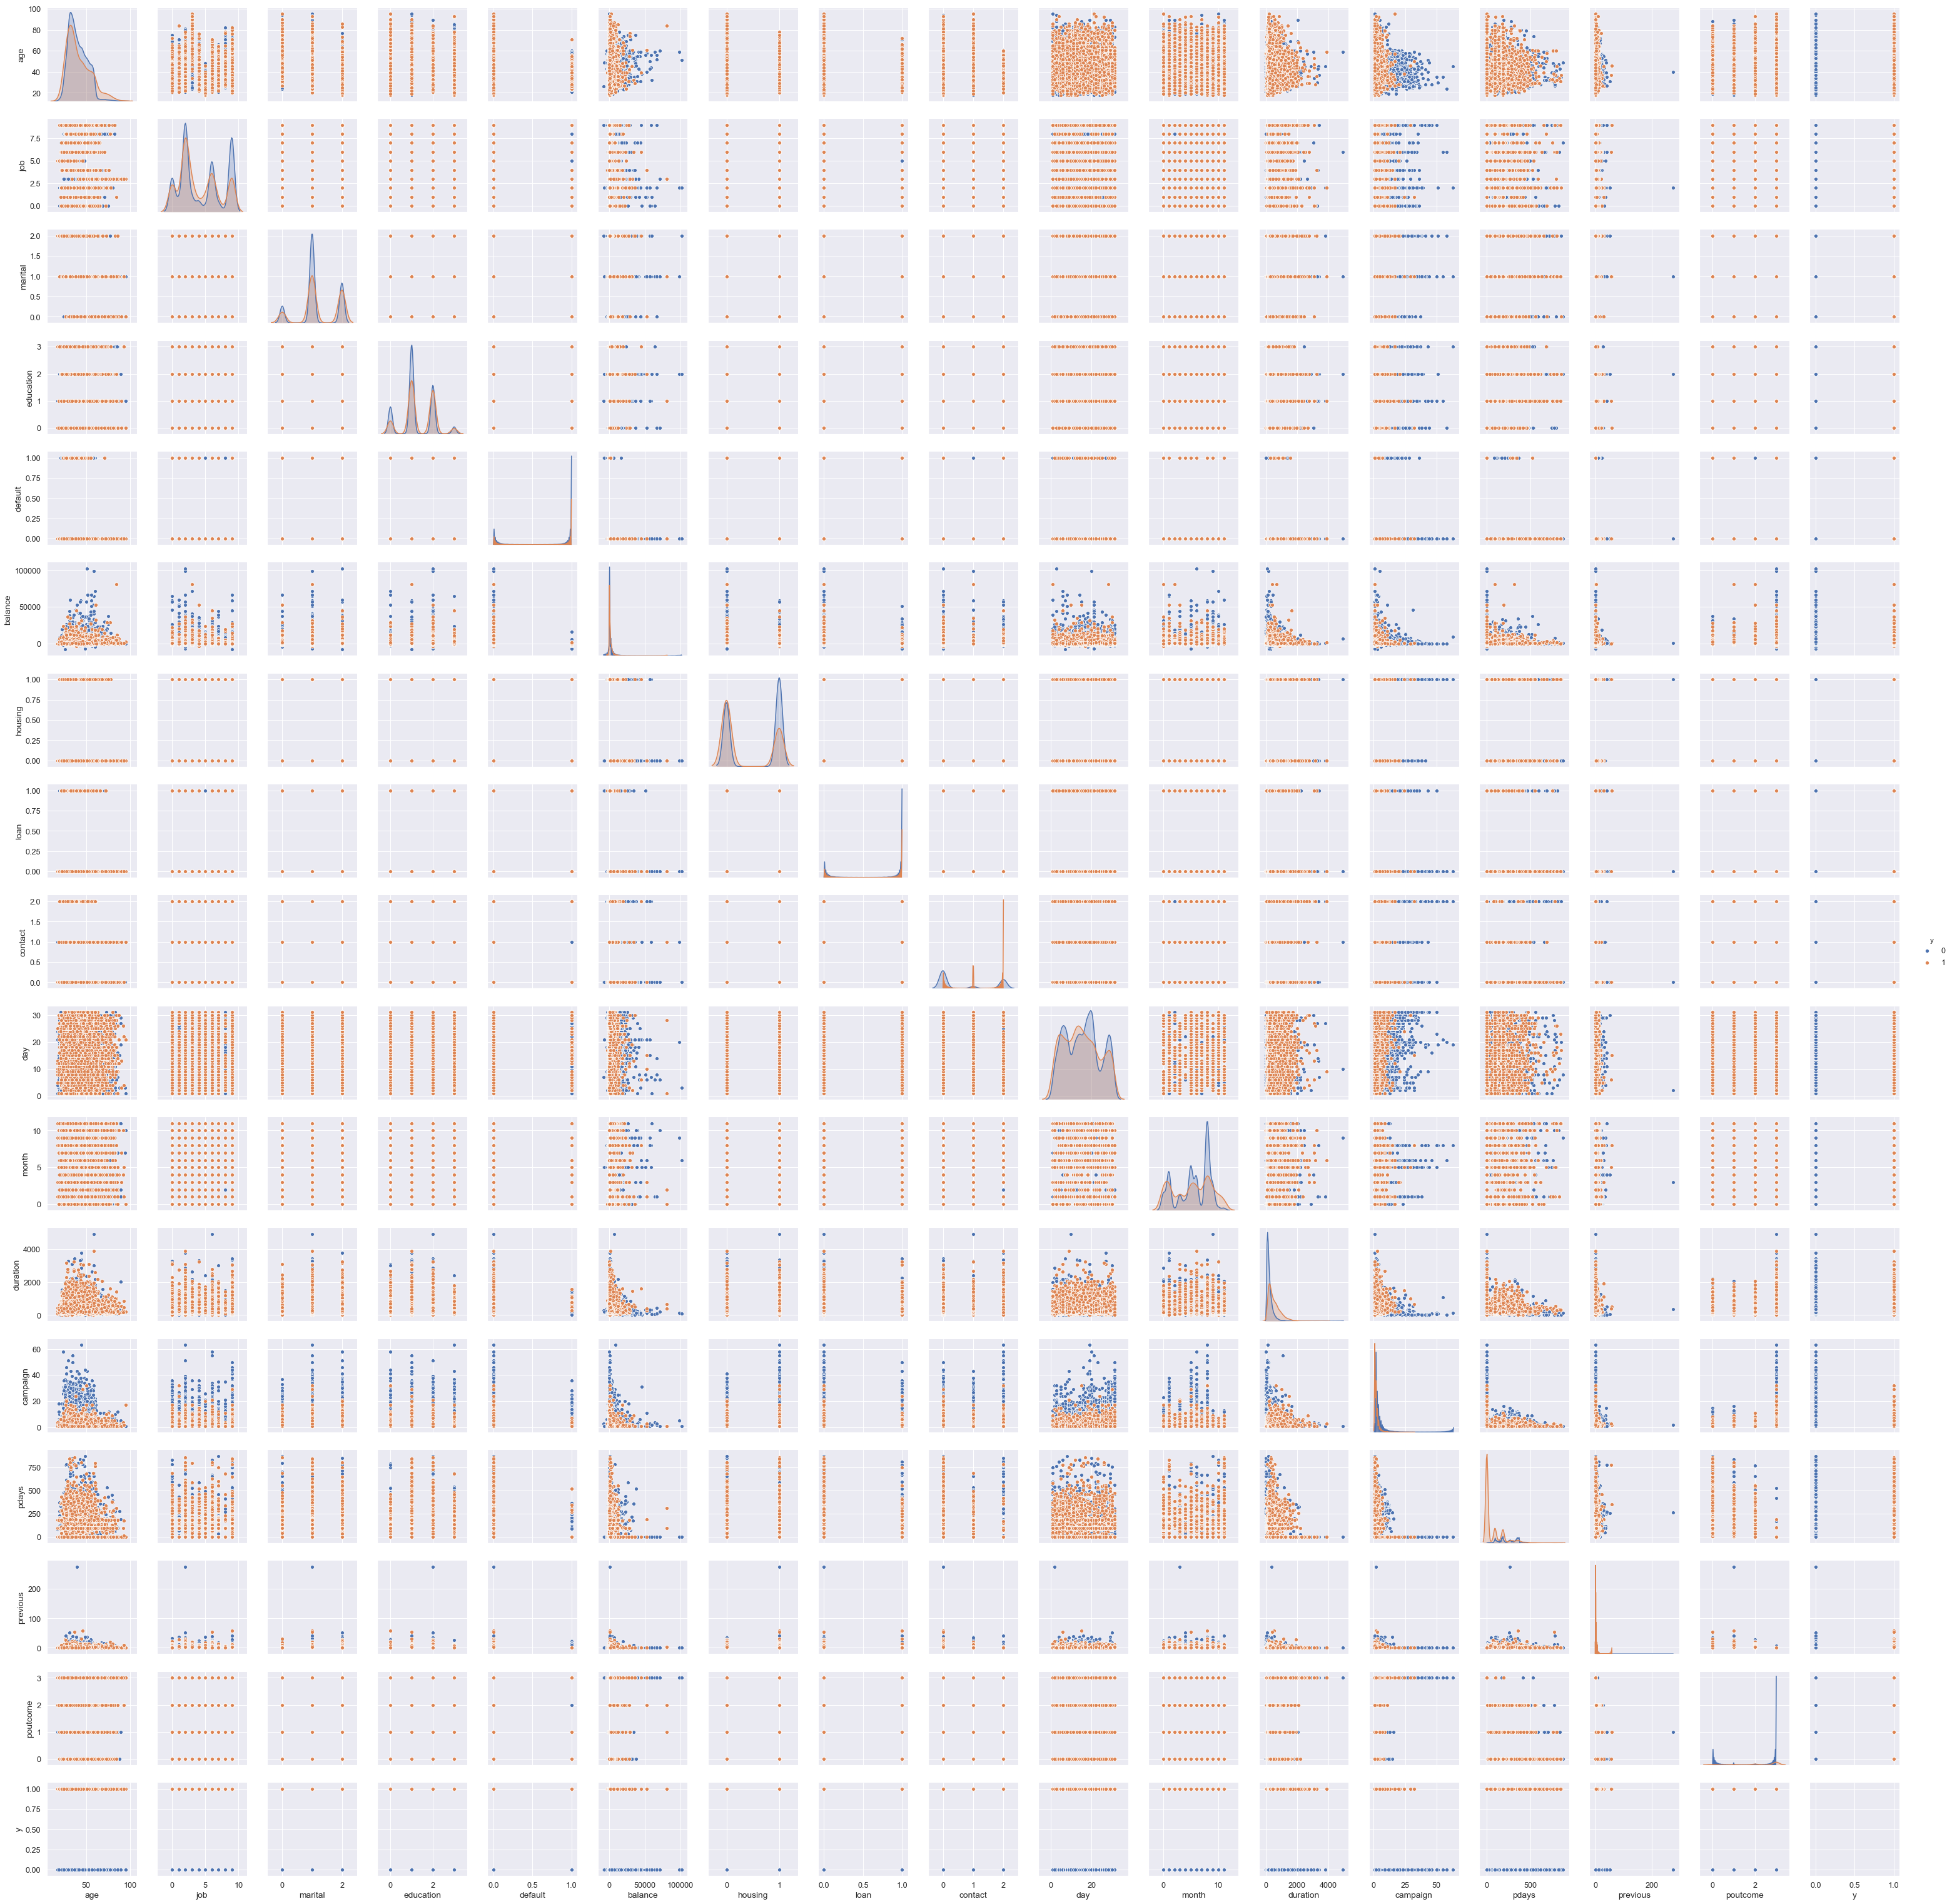

In [65]:
sns.pairplot(data,hue='y')

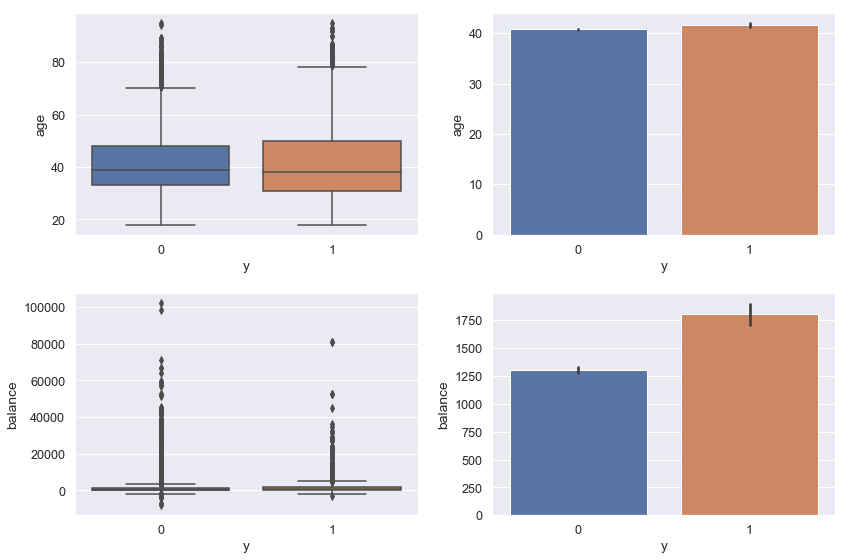

In [66]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x="y", y="age", data=data,ax=ax[0][0])
sns.barplot(x="y", y="age", data=data,ax=ax[0][1])
sns.boxplot(x="y", y="balance", data=data,ax=ax[1][0])
sns.barplot(x="y", y="balance", data=data,ax=ax[1][1])

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

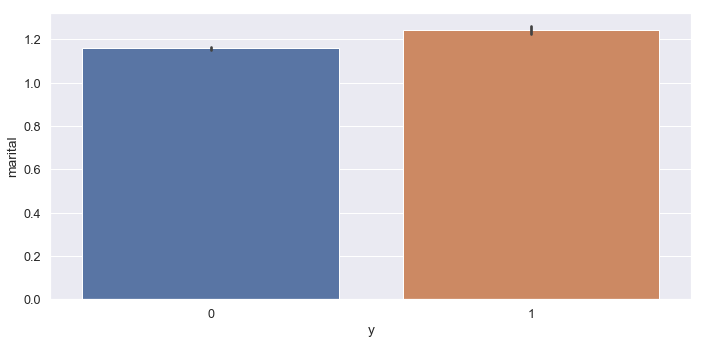

In [67]:
fig, ax1=plt.subplots(1,1,figsize=(10,5))

sns.barplot(x="y", y="marital", data=data,ax=ax1)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# Model Building

In [70]:
X=data.loc[:,data.columns!='y']
y=data.loc[:,data.columns=='y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve , roc_auc_score , classification_report , confusion_matrix

In [73]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
y_pred = lr.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8880861102919493

In [76]:
print('Confusion Matrix: \n',confusion_matrix(y_test , y_pred))
print('-'*50)
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('AUC : ' , roc_auc_score(y_test, y_pred))
print('-'*50)
print('Classification Report: \n',classification_report(y_test , y_pred))

Confusion Matrix: 
 [[11707   262]
 [ 1256   339]]
--------------------------------------------------
Accuracy Score:  0.8880861102919493
AUC :  0.595324651378653
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.21      0.31      1595

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.86      0.89      0.86     13564



Text(0, 0.5, 'True Positive Rate')

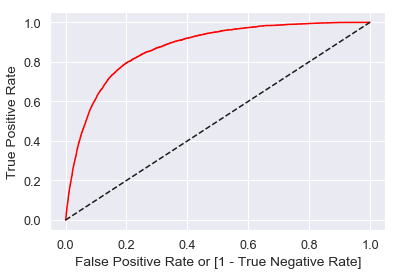

In [77]:
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,1])  

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [88]:
bank_new = data
X = bank_new.loc[:,bank_new.columns!='y']
y = bank_new.loc[:,bank_new.columns=='y']

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train[:1]

array([[ 1.61519942, -0.77068628, -0.27522248, -1.64055161, -0.13506755,
        -0.11392829, -1.11991981, -0.43758857,  1.51726654,  0.2626326 ,
         1.15471277, -0.20398668, -0.57035592, -0.41108056, -0.23732307,
         0.44500447]])

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
y_pred = lr.predict(X_test)

In [95]:
print('Confusion Matrix: \n',confusion_matrix(y_test , y_pred))
print('-'*50)
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('AUC : ' , roc_auc_score(y_test, y_pred))
print('-'*50)
print('Classification Report: \n',classification_report(y_test , y_pred))

Confusion Matrix: 
 [[11712   257]
 [ 1256   339]]
--------------------------------------------------
Accuracy Score:  0.8884547331170746
AUC :  0.5955335243003674
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.57      0.21      0.31      1595

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.60      0.62     13564
weighted avg       0.86      0.89      0.87     13564



Text(0, 0.5, 'True Positive Rate')

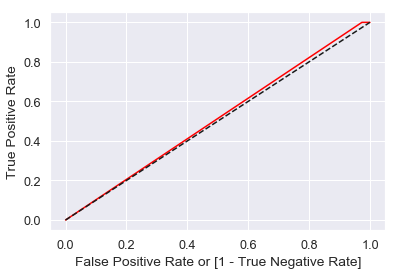

In [96]:
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,1])   

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

It means that the model will predict 89% correctly the customers who will subscribe term deposit and who will not. This model performed well as compared to unstandardized class models.